In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('machine Learning/Heart_1.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   object 
 1   age              4240 non-null   object 
 2   education        4240 non-null   object 
 3   cigsPerDay       4240 non-null   float64
 4   BP Meds          4240 non-null   float64
 5   prevalentStroke  4240 non-null   float64
 6   prevalentHyp     4240 non-null   float64
 7   diabetes         4240 non-null   float64
 8   tot cholesterol  4240 non-null   float64
 9   Systolic BP      4240 non-null   float64
 10  Diastolic BP     4240 non-null   float64
 11  BMI              4240 non-null   float64
 12  heartRate        4240 non-null   float64
 13  glucose          4240 non-null   float64
 14  Heart-Att        4240 non-null   int64  
dtypes: float64(11), int64(1), object(3)
memory usage: 497.0+ KB


In [10]:
print(df['age'].unique())


[39. 46. 48. 61. 43. 63. 45. 52. 50. 41. 38. 42. 44. 47. 60. 35. 36. 59.
 54. 37. 56. 53. 49. 65. 51. 62. 40. 67. 57. 66. nan 64. 55. 58. 34. 68.
 33. 70. 32. 69.]


In [8]:
# Show rows where age is not a proper number
df[~df['age'].astype(str).str.replace('.', '', 1).str.isdigit()]


,Gender,age,education,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
101,Female,<bound method Series.median of 0 39.0\n1...,3.0,0.0,1.0,0.0,1.0,0.0,1.0,141.0,84.0,29.66,75.0,105.0,0
343,Male,<bound method Series.median of 0 39.0\n1...,4.0,25.0,0.0,0.0,0.0,0.0,245.0,126.0,88.5,23.16,92.0,126.0,1


In [9]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # converts invalid to NaN


In [13]:
df['age'].isnull().sum()

np.int64(2)

In [14]:
df['age'].fillna(df['age'].median(), inplace=True)


In [16]:
bins = [ 30, 40, 50, 60, 70]
labels = ['30-40', '40-50', '50-60', '60-70']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [18]:
df['age_group'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4240 entries, 0 to 4239
Series name: age_group
Non-Null Count  Dtype   
--------------  -----   
4240 non-null   category
dtypes: category(1)
memory usage: 4.5 KB


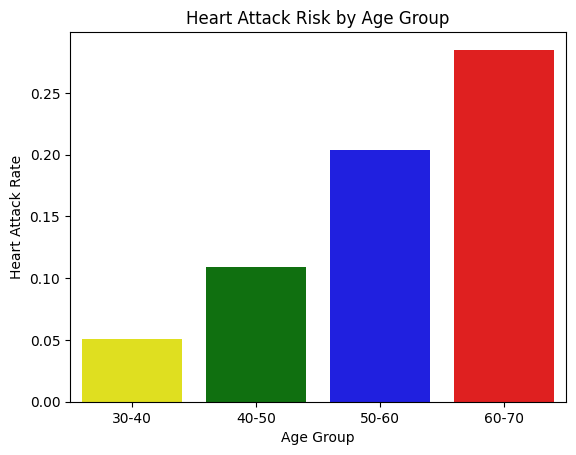

In [20]:
risk_by_age = df.groupby('age_group')['Heart-Att'].mean().reset_index()
colors = ['yellow', 'green', 'blue', 'red'] 

sns.barplot(x='age_group', y='Heart-Att',data=risk_by_age,orient='v',palette=colors)
plt.ylabel("Heart Attack Rate")
plt.xlabel("Age Group")
plt.title("Heart Attack Risk by Age Group")
plt.show()

In [22]:
df['high_risk_age_group'] = df['age'].apply(lambda x: 3 if x >= 60 else (2 if x >= 50 else (1 if x >= 40 else 0)))


In [23]:
df['age_group'].value_counts()

age_group
40-50    1610
50-60    1303
30-40     748
60-70     579
Name: count, dtype: int64

In [27]:
df['high_risk_age_group'].value_counts()

high_risk_age_group
1    1662
2    1333
3     689
0     556
Name: count, dtype: int64

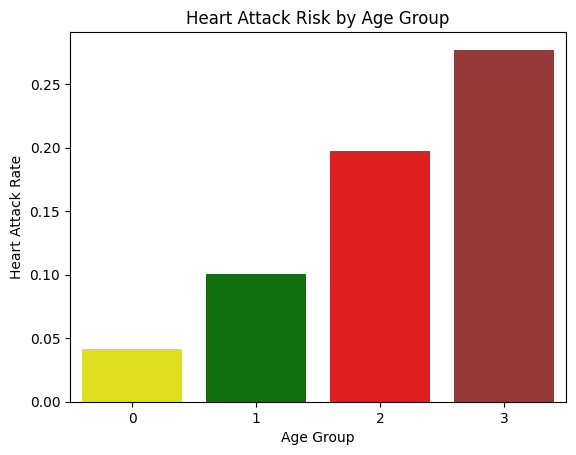

In [28]:
risk_by_age = df.groupby('high_risk_age_group')['Heart-Att'].mean().reset_index()
colors = ['yellow', 'green', 'red', 'brown'] 

sns.barplot(x='high_risk_age_group', y='Heart-Att',data=risk_by_age,orient='v',palette=colors)
plt.ylabel("Heart Attack Rate")
plt.xlabel("Age Group")
plt.title("Heart Attack Risk by Age Group")
plt.show()

In [34]:
df[df['BMI']<=18].value_counts().sum()

np.int64(35)

In [39]:
df[(df['BMI']>=26) & (df['Heart-Att'] == 1)].value_counts().sum()


np.int64(340)

In [40]:
df['bmi_risk'] = df['BMI'].apply(lambda x: 2 if (x >= 30 or x < 18) else (1 if x >= 26 else 0))


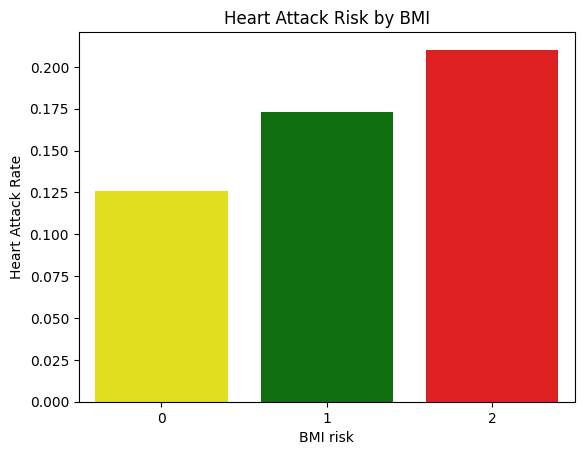

In [43]:
risk_by_bmi = df.groupby('bmi_risk')['Heart-Att'].mean().reset_index()
colors = ['yellow', 'green', 'red', 'brown'] 

sns.barplot(x='bmi_risk', y='Heart-Att',data=risk_by_bmi,orient='v',palette=colors)
plt.ylabel("Heart Attack Rate")
plt.xlabel("BMI risk")
plt.title("Heart Attack Risk by BMI")
plt.show()

In [44]:
df['bmi_risk'].value_counts()

bmi_risk
0    2353
1    1302
2     585
Name: count, dtype: int64

In [52]:
df[(df['cigsPerDay']>=20) & (df['Heart-Att'] == 1)].value_counts().sum()

np.int64(219)

In [53]:
df[df['cigsPerDay']>=20].value_counts().sum()


np.int64(1224)

In [75]:
df['smoking_riskkk'] = df['cigsPerDay'].apply(lambda x: 2 if x >=20 else (1 if x >=10  else 0))


In [76]:
df['smoking_riskkk'].value_counts()

smoking_riskkk
0    2630
2    1224
1     386
Name: count, dtype: int64

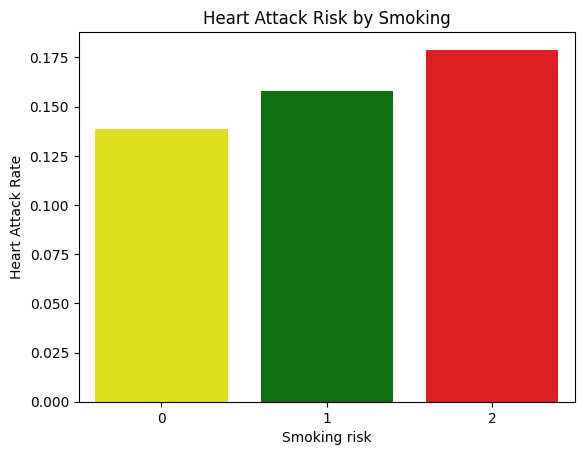

In [77]:
risk_by_smok = df.groupby('smoking_riskkk')['Heart-Att'].mean().reset_index()
colors = ['yellow', 'green', 'red', 'brown'] 

sns.barplot(x='smoking_riskkk', y='Heart-Att',data=risk_by_smok,orient='v',palette=colors)
plt.ylabel("Heart Attack Rate")
plt.xlabel("Smoking risk")
plt.title("Heart Attack Risk by Smoking")
plt.show()

In [80]:
df[df['tot cholesterol']>=240].value_counts().sum()

np.int64(1899)

In [81]:
df['cholesterol_risk'] = df['tot cholesterol'].apply(lambda x: 2 if x >=260 else (1 if x >=240  else 0))

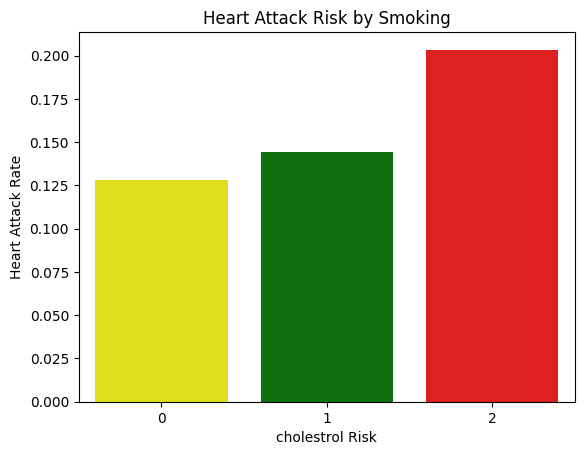

In [83]:
risk_by_ch = df.groupby('cholesterol_risk')['Heart-Att'].mean().reset_index()
colors = ['yellow', 'green', 'red', 'brown'] 

sns.barplot(x='cholesterol_risk', y='Heart-Att',data=risk_by_ch,orient='v',palette=colors)
plt.ylabel("Heart Attack Rate")
plt.xlabel("cholestrol Risk")
plt.title("Heart Attack Risk by Smoking")
plt.show()

In [84]:
df['cholesterol_risk'].value_counts()

cholesterol_risk
0    2341
2    1185
1     714
Name: count, dtype: int64

Text(0, 0.5, 'Herat attack rate')

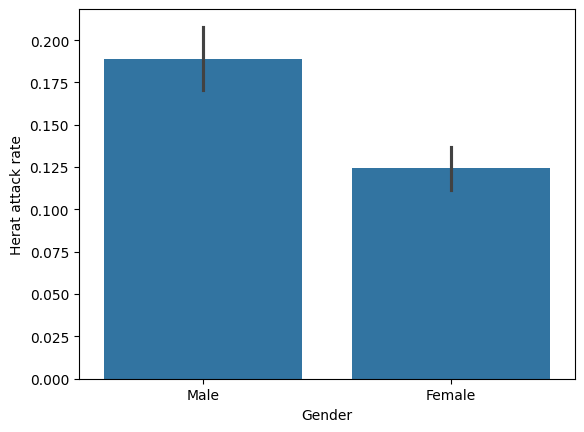

In [85]:
sns.barplot(x='Gender',y='Heart-Att',data=df)
plt.xlabel('Gender')
plt.ylabel("Herat attack rate")

In [87]:
df[(df['Gender']=='Female')&(df['cholesterol_risk']==2)][['Gender','cholesterol_risk']].value_counts().sum()

np.int64(746)

In [90]:
df[(df['Gender'] == 'Female') & (df['bmi_risk'] == 2)][['Gender', 'bmi_risk']].value_counts().sum()


np.int64(356)

In [89]:
df[(df['Gender']=='Female')&(df['smoking_riskkk']==2)][['Gender','smoking_riskkk']].value_counts().sum()

np.int64(413)

In [91]:
df['gender_risk']=df.apply(lambda row:3 if row['Gender']=='Male' and (row['smoking_riskkk']==2 or
                                                                     row['cholesterol_risk']==2 or
                                                                     row['prevalentHyp']==1)or
                                                                     row['bmi_risk']==2
 
                           else 2 if row['Gender']=='Female' and (row['smoking_riskkk']==2 or
                                                                     row['cholesterol_risk']==2 or
                                                                     row['prevalentHyp']==1)or
                                                                     row['bmi_risk']==2
                           else 1 if row['Gender']=='Male'
                           else 0,
                           axis=1 )

In [92]:
df['gender_risk'].value_counts()

gender_risk
3    1685
2    1165
0     901
1     489
Name: count, dtype: int64

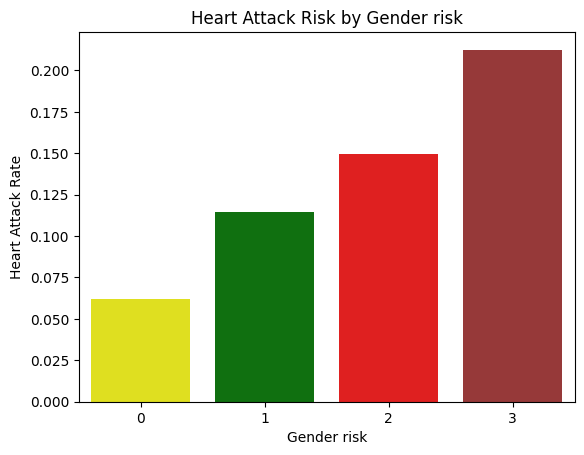

In [94]:
risk_by_ch = df.groupby('gender_risk')['Heart-Att'].mean().reset_index()
colors = ['yellow', 'green', 'red', 'brown'] 

sns.barplot(x='gender_risk', y='Heart-Att',data=risk_by_ch,orient='v',palette=colors)
plt.ylabel("Heart Attack Rate")
plt.xlabel("Gender risk")
plt.title("Heart Attack Risk by Gender risk")
plt.show()

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               4240 non-null   object  
 1   age                  4240 non-null   float64 
 2   education            4240 non-null   object  
 3   cigsPerDay           4240 non-null   float64 
 4   BP Meds              4240 non-null   float64 
 5   prevalentStroke      4240 non-null   float64 
 6   prevalentHyp         4240 non-null   float64 
 7   diabetes             4240 non-null   float64 
 8   tot cholesterol      4240 non-null   float64 
 9   Systolic BP          4240 non-null   float64 
 10  Diastolic BP         4240 non-null   float64 
 11  BMI                  4240 non-null   float64 
 12  heartRate            4240 non-null   float64 
 13  glucose              4240 non-null   float64 
 14  Heart-Att            4240 non-null   int64   
 15  age_group            

In [97]:
df.drop(['smoking_risk','smoking_riskk'],axis=1,inplace=True)

In [274]:
correlation=df[['Systolic BP','Diastolic BP','glucose','BP Meds','diabetes','prevalentStroke','heartRate','prevalentHyp']]

In [275]:
cr=correlation.corr()

<Axes: >

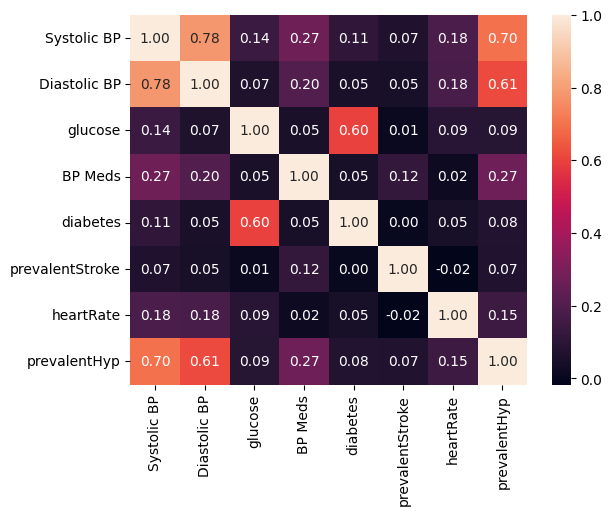

In [276]:
sns.heatmap(cr,annot=True,fmt='.2f')

In [103]:
df['heartRate'].describe()

count    4240.000000
mean       75.866981
std        11.993855
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [135]:
pd.crosstab(df['heartRate']>105, df['Heart-Att'], normalize='index')

Heart-Att,0,1
heartRate,,
False,0.849328,0.150672
True,0.777778,0.222222


In [126]:
df['Heartrate_risk'] = df['heartRate'].apply(lambda x: 1 if x >=108  else 0)

In [127]:
df['Heartrate_risk'].value_counts()

Heartrate_risk
0    4174
1      66
Name: count, dtype: int64

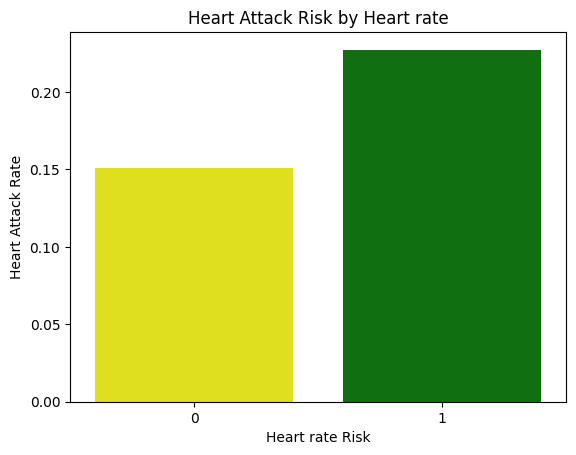

In [137]:
risk_by_ch = df.groupby('Heartrate_risk')['Heart-Att'].mean().reset_index()
colors = ['yellow', 'green', 'red', 'brown'] 

sns.barplot(x='Heartrate_risk', y='Heart-Att',data=risk_by_ch,orient='v',palette=colors)
plt.ylabel("Heart Attack Rate")
plt.xlabel("Heart rate Risk")
plt.title("Heart Attack Risk by Heart rate")
plt.show()

In [139]:
df[['Systolic BP','Diastolic BP']].describe()

,Systolic BP,Diastolic BP
count,4240.000000,4240.000000
mean,132.358255,82.900825
std,22.029250,11.907479
min,83.500000,48.000000
25%,117.000000,75.000000
50%,128.000000,82.000000
75%,144.000000,89.625000
max,295.000000,142.500000


In [204]:
pd.crosstab(df['Systolic BP']>130, df['Heart-Att'], normalize='index')

Heart-Att,0,1
Systolic BP,,
False,0.902104,0.097896
True,0.782313,0.217687


In [202]:
pd.crosstab(df['Systolic BP']<94, df['Heart-Att'], normalize='index')


Heart-Att,0,1
Systolic BP,,
False,0.848356,0.151644
True,0.769231,0.230769


In [203]:
df[df['Systolic BP']<94].value_counts().sum()

np.int64(13)

In [194]:
df[df['Systolic BP']>145].value_counts().sum()

np.int64(965)

In [190]:
pd.crosstab(df['Diastolic BP']>90, df['Heart-Att'], normalize='index')

Heart-Att,0,1
Diastolic BP,,
False,0.874773,0.125227
True,0.754777,0.245223


In [186]:
df[df['Diastolic BP']>90].value_counts().sum()



np.int64(942)

In [187]:
df[df['Diastolic BP']<=60].value_counts().sum()


np.int64(67)

In [189]:
pd.crosstab(df['Diastolic BP']<=58, df['Heart-Att'], normalize='index')

Heart-Att,0,1
Diastolic BP,,
False,0.848636,0.151364
True,0.760000,0.240000


In [191]:
df['Diastolic_BP_risk'] = df['Diastolic BP'].apply(lambda x: 2 if (x >100 or x<=55) else (1 if (x >90 or x<=58)  else 0))

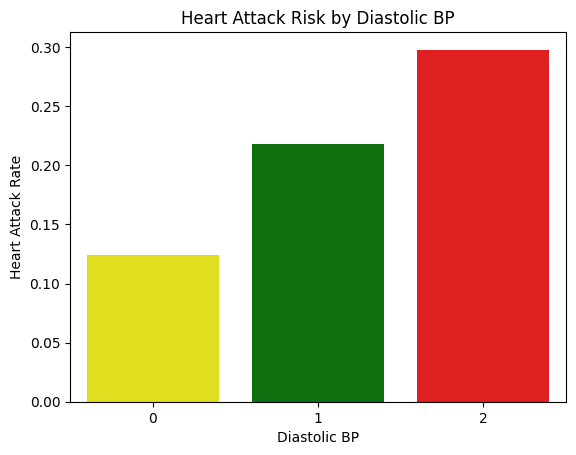

In [193]:
risk_by_ch = df.groupby('Diastolic_BP_risk')['Heart-Att'].mean().reset_index()
colors = ['yellow', 'green', 'red', 'brown'] 

sns.barplot(x='Diastolic_BP_risk', y='Heart-Att',data=risk_by_ch,orient='v',palette=colors)
plt.ylabel("Heart Attack Rate")
plt.xlabel("Diastolic BP")
plt.title("Heart Attack Risk by Diastolic BP")
plt.show()

In [205]:
df['Systolic_BP_risk'] = df['Systolic BP'].apply(lambda x: 2 if (x >145 or x<90) else (1 if (x >130 or x<94)  else 0))

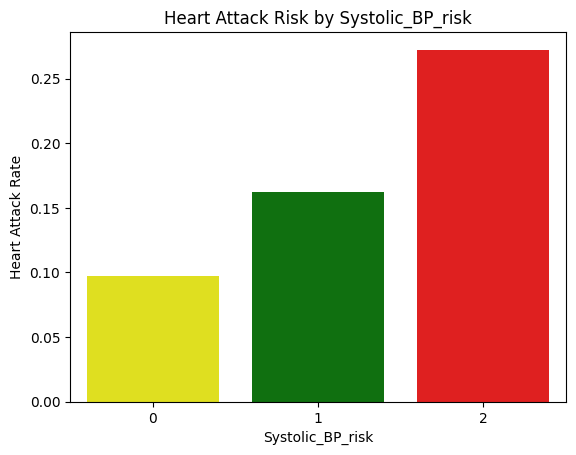

In [206]:
risk_by_ch = df.groupby('Systolic_BP_risk')['Heart-Att'].mean().reset_index()
colors = ['yellow', 'green', 'red', 'brown'] 

sns.barplot(x='Systolic_BP_risk', y='Heart-Att',data=risk_by_ch,orient='v',palette=colors)
plt.ylabel("Heart Attack Rate")
plt.xlabel("Systolic_BP_risk")
plt.title("Heart Attack Risk by Systolic_BP_risk")
plt.show()

In [207]:
df['Systolic_BP_risk'].value_counts()

Systolic_BP_risk
0    2316
2     969
1     955
Name: count, dtype: int64

In [209]:
df['Diastolic_BP_risk'].value_counts()

Diastolic_BP_risk
0    3273
1     638
2     329
Name: count, dtype: int64

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               4240 non-null   object  
 1   age                  4240 non-null   float64 
 2   education            4240 non-null   object  
 3   cigsPerDay           4240 non-null   float64 
 4   BP Meds              4240 non-null   float64 
 5   prevalentStroke      4240 non-null   float64 
 6   prevalentHyp         4240 non-null   float64 
 7   diabetes             4240 non-null   float64 
 8   tot cholesterol      4240 non-null   float64 
 9   Systolic BP          4240 non-null   float64 
 10  Diastolic BP         4240 non-null   float64 
 11  BMI                  4240 non-null   float64 
 12  heartRate            4240 non-null   float64 
 13  glucose              4240 non-null   float64 
 14  Heart-Att            4240 non-null   int64   
 15  age_group            

In [211]:
df['glucose'].describe()

count    4240.000000
mean       82.198821
std        23.387125
min        40.000000
25%        72.000000
50%        78.000000
75%        86.000000
max       394.000000
Name: glucose, dtype: float64

In [268]:
pd.crosstab(df['glucose']<46, df['Heart-Att'], normalize='index')

Heart-Att,0,1
glucose,,
False,0.848263,0.151737
True,0.777778,0.222222


In [252]:
df[df['glucose']<=46].value_counts().sum()

np.int64(9)

In [269]:
pd.crosstab(df['glucose']>110, df['Heart-Att'], normalize='index')

Heart-Att,0,1
glucose,,
False,0.865918,0.134082
True,0.544681,0.455319


In [260]:
df[df['glucose']>105].value_counts().sum()

np.int64(285)

In [263]:
df['Glucose_risk'] = df['glucose'].apply(lambda x: 2 if (x >120 or x<=42) else (1 if (x >105 or x<46)  else 0))

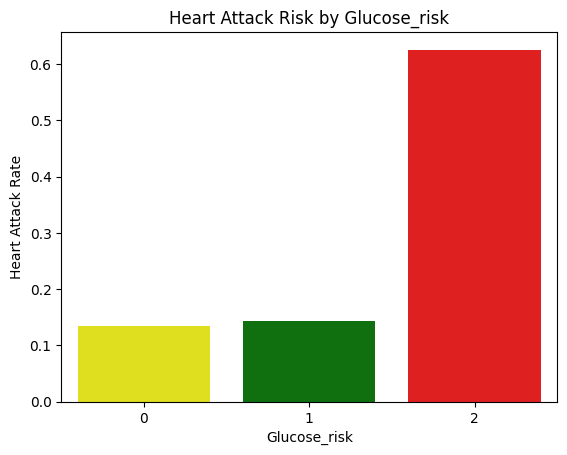

In [266]:
risk_by_gl = df.groupby('Glucose_risk')['Heart-Att'].mean().reset_index()
colors = ['yellow', 'green', 'red', 'brown'] 

sns.barplot(x='Glucose_risk', y='Heart-Att',data=risk_by_gl,orient='v',palette=colors)
plt.ylabel("Heart Attack Rate")
plt.xlabel("Glucose_risk")
plt.title("Heart Attack Risk by Glucose_risk")
plt.show()

In [264]:
df['Glucose_risk'].value_counts()

Glucose_risk
0    3946
2     155
1     139
Name: count, dtype: int64

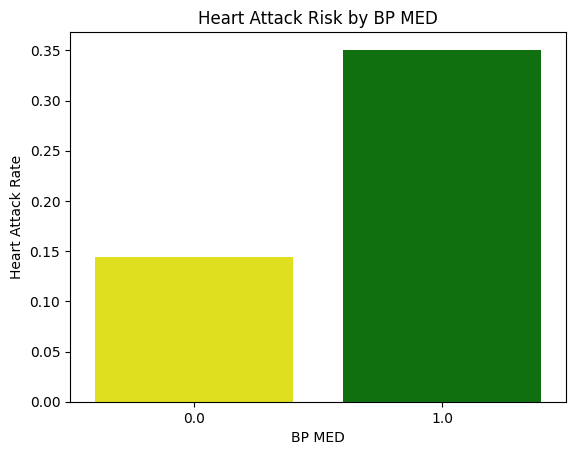

In [270]:
risk_by_bpmed = df.groupby('BP Meds')['Heart-Att'].mean().reset_index()
colors = ['yellow', 'green', 'red', 'brown'] 

sns.barplot(x='BP Meds', y='Heart-Att',data=risk_by_bpmed,orient='v',palette=colors)
plt.ylabel("Heart Attack Rate")
plt.xlabel("BP MED")
plt.title("Heart Attack Risk by BP MED")
plt.show()

In [271]:
df['BP Meds'].value_counts()

BP Meds
0.0    4086
1.0     154
Name: count, dtype: int64

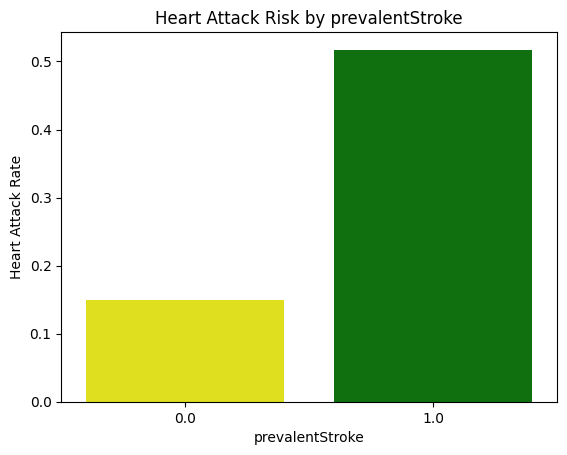

In [272]:
risk_by_stroke = df.groupby('prevalentStroke')['Heart-Att'].mean().reset_index()
colors = ['yellow', 'green', 'red', 'brown'] 

sns.barplot(x='prevalentStroke', y='Heart-Att',data=risk_by_stroke,orient='v',palette=colors)
plt.ylabel("Heart Attack Rate")
plt.xlabel("prevalentStroke")
plt.title("Heart Attack Risk by prevalentStroke")
plt.show()

In [273]:
df['prevalentStroke'].value_counts()

prevalentStroke
0.0    4211
1.0      29
Name: count, dtype: int64

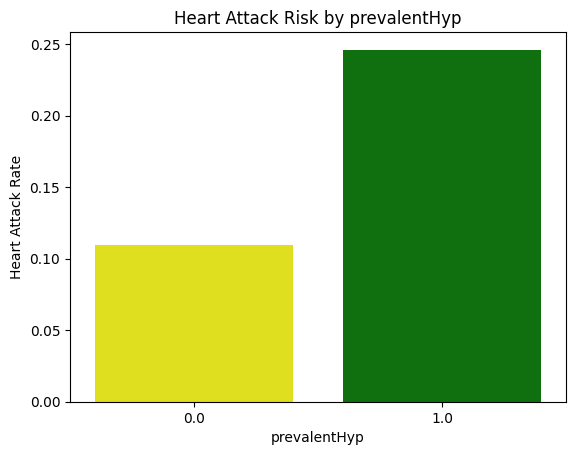

In [277]:
risk_by_hp = df.groupby('prevalentHyp')['Heart-Att'].mean().reset_index()
colors = ['yellow', 'green', 'red', 'brown'] 

sns.barplot(x='prevalentHyp', y='Heart-Att',data=risk_by_hp,orient='v',palette=colors)
plt.ylabel("Heart Attack Rate")
plt.xlabel("prevalentHyp")
plt.title("Heart Attack Risk by prevalentHyp")
plt.show()

In [279]:
df['prevalentHyp'].value_counts()

prevalentHyp
0.0    2924
1.0    1316
Name: count, dtype: int64

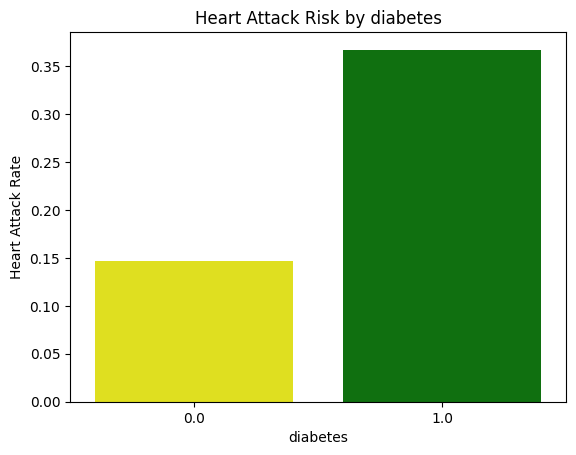

In [281]:
risk_by_db = df.groupby('diabetes')['Heart-Att'].mean().reset_index()
colors = ['yellow', 'green', 'red', 'brown'] 

sns.barplot(x='diabetes', y='Heart-Att',data=risk_by_db,orient='v',palette=colors)
plt.ylabel("Heart Attack Rate")
plt.xlabel("diabetes")
plt.title("Heart Attack Risk by diabetes")
plt.show()

In [282]:
df['diabetes'].value_counts()

diabetes
0.0    4131
1.0     109
Name: count, dtype: int64

In [288]:
df['education'].unique()

array([4., 2., 1., 3.])

In [287]:
edu_median = df[df['education'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]['education'].astype(float).median()


df['education'] = df['education'].apply(lambda x: edu_median if 'bound method' in str(x) else float(x))

In [290]:
df['education_new']=df['education'].replace({1.0:3,4.0:2.0,3.0:1,2.0:0})

In [292]:
df['education_new'].value_counts()

education_new
3.0    1734
0.0    1345
1.0     688
2.0     473
Name: count, dtype: int64

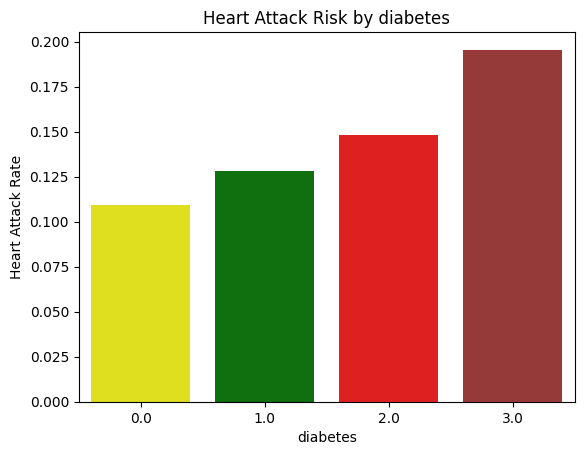

In [293]:
risk_by_db = df.groupby('education_new')['Heart-Att'].mean().reset_index()
colors = ['yellow', 'green', 'red', 'brown'] 

sns.barplot(x='education_new', y='Heart-Att',data=risk_by_db,orient='v',palette=colors)
plt.ylabel("Heart Attack Rate")
plt.xlabel("diabetes")
plt.title("Heart Attack Risk by diabetes")
plt.show()

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               4240 non-null   object  
 1   age                  4240 non-null   float64 
 2   education            4240 non-null   float64 
 3   cigsPerDay           4240 non-null   float64 
 4   BP Meds              4240 non-null   float64 
 5   prevalentStroke      4240 non-null   float64 
 6   prevalentHyp         4240 non-null   float64 
 7   diabetes             4240 non-null   float64 
 8   tot cholesterol      4240 non-null   float64 
 9   Systolic BP          4240 non-null   float64 
 10  Diastolic BP         4240 non-null   float64 
 11  BMI                  4240 non-null   float64 
 12  heartRate            4240 non-null   float64 
 13  glucose              4240 non-null   float64 
 14  Heart-Att            4240 non-null   int64   
 15  age_group            

In [295]:
dff=df[['BP Meds','prevalentStroke','prevalentHyp','diabetes','high_risk_age_group',
'bmi_risk','smoking_riskkk','cholesterol_risk','gender_risk','Heartrate_risk','Diastolic_BP_risk','Systolic_BP_risk',
'Glucose_risk','education_new','Heart-Att']]

In [296]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BP Meds              4240 non-null   float64
 1   prevalentStroke      4240 non-null   float64
 2   prevalentHyp         4240 non-null   float64
 3   diabetes             4240 non-null   float64
 4   high_risk_age_group  4240 non-null   int64  
 5   bmi_risk             4240 non-null   int64  
 6   smoking_riskkk       4240 non-null   int64  
 7   cholesterol_risk     4240 non-null   int64  
 8   gender_risk          4240 non-null   int64  
 9   Heartrate_risk       4240 non-null   int64  
 10  Diastolic_BP_risk    4240 non-null   int64  
 11  Systolic_BP_risk     4240 non-null   int64  
 12  Glucose_risk         4240 non-null   int64  
 13  education_new        4240 non-null   float64
 14  Heart-Att            4240 non-null   int64  
dtypes: float64(5), int64(10)
memory usage:

In [297]:
dff.to_csv("C:/Users/tinup/machine Learning/Heart2.csv", index=False)